In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3 
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'write/GSE142585_Hum_Analysis.h5ad'

In [4]:
adata = sc.read_h5ad('write/GSE142585_Hum.h5ad')  

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


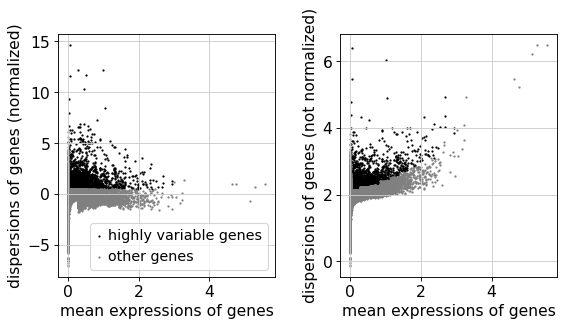

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [7]:
adata.raw = adata

In [8]:
adata = adata[:, adata.var.highly_variable]

In [9]:
adata

View of AnnData object with n_obs × n_vars = 13628 × 6267
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doublet_info_colors', 'log1p', 'hvg'

In [10]:
sc.pp.regress_out(adata, ['total_counts' ,'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:01:17)


In [11]:
sc.pp.scale(adata, max_value=10)

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


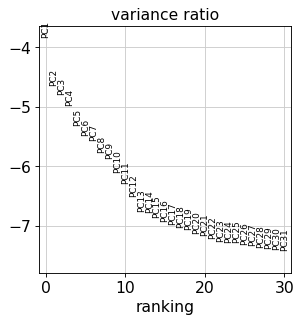

In [13]:
sc.pl.pca_variance_ratio(adata, log=True)

In [14]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 13628 × 6267
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)


In [16]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


In [41]:
sc.tl.leiden(adata, resolution = 0.075, key_added = "leiden")

running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


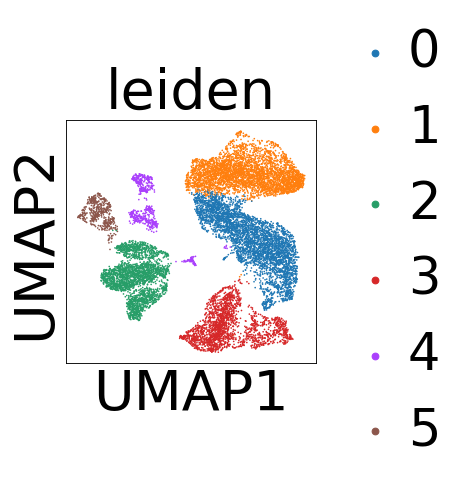

In [59]:
sc.pl.umap(adata, color='leiden')

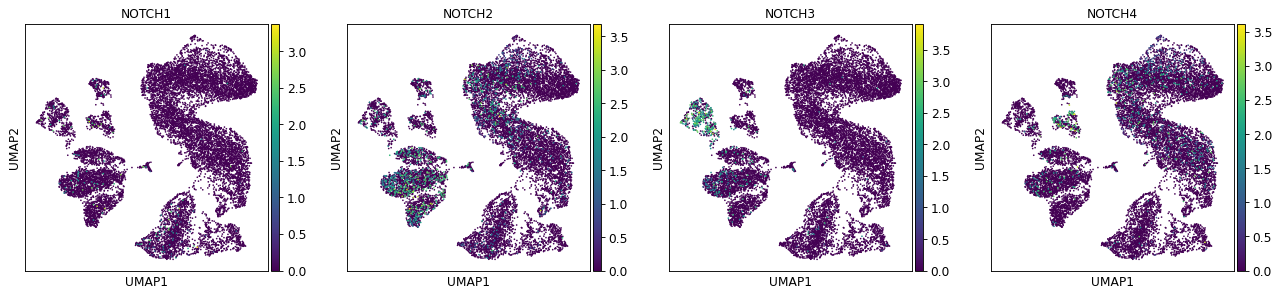

In [44]:
sc.pl.umap(adata, color=['NOTCH1','NOTCH2','NOTCH3','NOTCH4'])

In [53]:
marker_genes_1 = {
    'Sperm':['PRM1'],     # PMID 2006171
    'SC':['CCNA1'],       # PMID 28301569
    'Spg':['DMRT1'],      # PMID 16397242
    'Sertoli':['WT1'],    # PMID 23935527
    'Leydig':['CYP17A1'], # PMID 12193547
    'BV':['CD34'],        # PMID 24606466
    'Int':['ACTA2']       # PMID 16325810
}

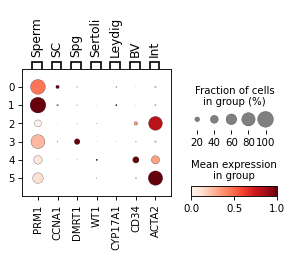

In [54]:
sc.pl.dotplot(adata, marker_genes_1, 'leiden', dendrogram=False,standard_scale='var')
sc.set_figure_params(scanpy=True,fontsize=11)

In [55]:
annotation_list = {
    '0':'0: SC',
    '1':'1: Sperm',
    '2':'2: Int1',
    '3':'3: Spg',
    '4':'4: BV',
    '5':'5: Int2'
}

... storing 'cell_type' as categorical


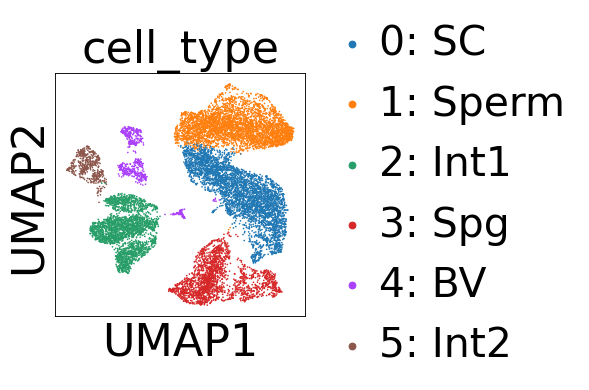

In [58]:
adata.obs['cell_type'] = [annotation_list[clust] for clust in adata.obs['leiden']]

sc.pl.umap(adata, color = 'cell_type')
sc.set_figure_params(scanpy=True,fontsize=50)

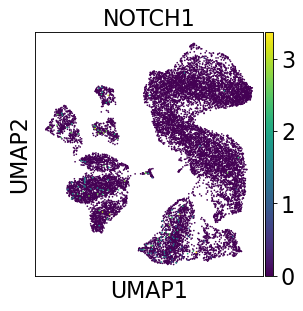

In [25]:
sc.pl.umap(adata, color=['NOTCH1'])

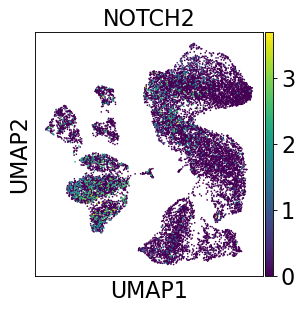

In [26]:
sc.pl.umap(adata, color=['NOTCH2'])

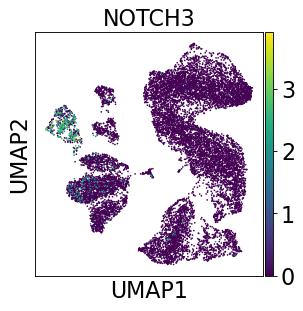

In [27]:
sc.pl.umap(adata, color=['NOTCH3'])

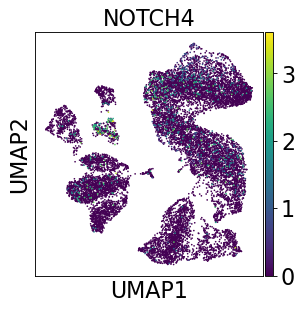

In [28]:
sc.pl.umap(adata, color=['NOTCH4'])

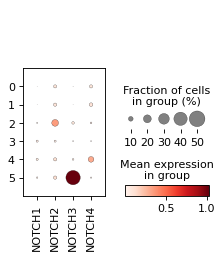

In [64]:
sc.pl.dotplot(adata, ['NOTCH1','NOTCH2','NOTCH3','NOTCH4'], 'leiden', dendrogram=False)
sc.set_figure_params(scanpy=True,fontsize=25)

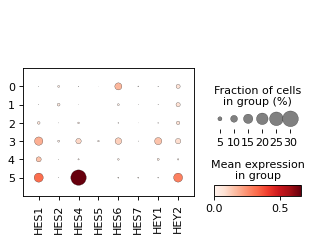

In [67]:
sc.pl.dotplot(adata, ['HES1','HES2','HES4','HES5','HES6','HES7','HEY1','HEY2'], 'leiden', dendrogram=False)
sc.set_figure_params(scanpy=True,fontsize=10)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")